# Linear Regression.

Linear regression is method used to predict the out come from a datasets using the vailable data. The method has a a number of tools that can be used to predicti the data. The most used technique associated with this method is the least Square method.

In [5]:
!git a

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Linear_Regression .ipynb

no changes added to commit (use "git add" and/or "git commit -a")


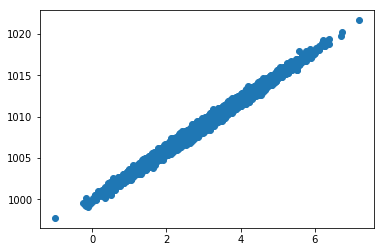

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 10000)
purchaseAmount = 1000 + (pageSpeeds - np.random.normal(0, 0.1, 10000)) * 3

scatter(pageSpeeds, purchaseAmount)

In [2]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)


In [3]:
r_value ** 2

0.9901651397898887

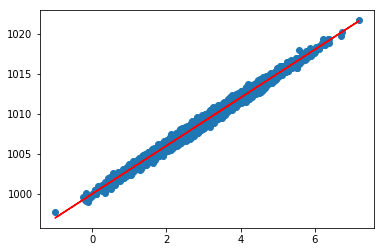

In [4]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()